In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sympy as sp

Utilizamos estos métodos para encontrar raices de funciones o ecuaciones trascendentales, siempre vamos a tener un error asociado.

<a name="start">Inicio</a>
# Teoría de Errores
Revisar clase 5


<a name="menu">menu</a>
## Métodos para encontrar raices

Tenemos varios metodos para encontrar estas raices, entre ellos veremos:
1.  [Introducción](#introduction)
2.  [El método gráfico: Introducción.](#graphic)
3.  [El método de la bisección.](#bisection)
4.  [El método de punto fijo.](#punto_fijo)  
5.  [El método de Newton-Raphson.](#newton_raphson)
6.  [Método de la secante.](#secante)
7.  [Método de la posición falsa.](#posicion_falsa)
8.  [Método de Steffensen.](#Steffensen)
9.  [Bibliografia](#bibliografia)


# Introducción

<a name="introduction">introduction</a>

[menu](#menu)

Grafica de $$f(λ) = 1000e^{⁻\lambda}+\frac{1}{\lambda}(e^{-\lambda}-1)-5000$$

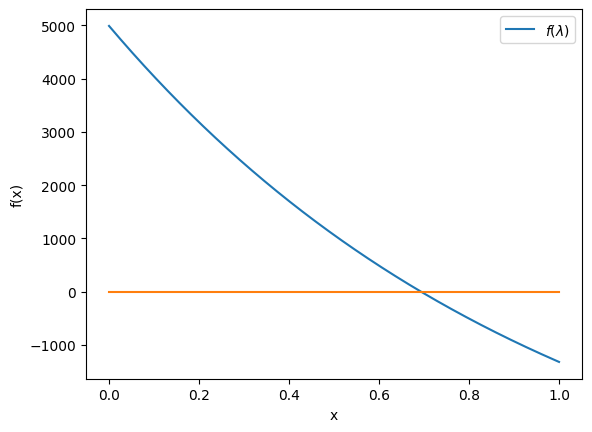

In [ ]:
f = lambda x: 1e4*np.exp(-x)+(1/x)*(np.exp(-x)-1)-5000

x = np.arange(0.001,1, 0.001)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,f(x), label= '$f(\lambda$)')
plt.plot([0,1],[0,0])
plt.legend()

plt.show()

Para encontrar soluciones a las funciones trascendentales, se pueden aplicar diferentes metodos para encontrar aproximaciones tales como los mecionados anteriormente, y este es uno de los fuertes de los metodos númericos y computacionales...

<a name="graphic"></a>

[menu](#menu)


### Método grafico
Este es un metodo bueno, pero existen métodos mas optimos, por lo que es mejor buscar otras alternativas como los metodos que se mostraran a continuación

Un ejemplo podria ser tener la función:

$f(x) = x - cos(x)$

esta se puede igualar a 0

$f(x) = x - cos(x) = 0$

de donde

$x = cos(x)$

entonces podemos graficar ambas funciones y ver su intersección

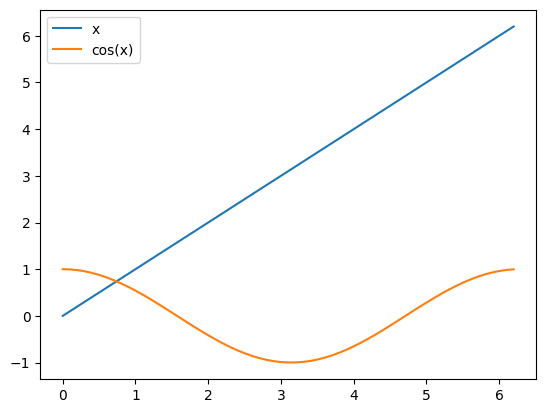

In [ ]:
# Ejemplo método grafico

x = np.arange(0, 2*np.pi, .1)
intersection_func = lambda x: x-np.cos(x)

plt.plot(x,x,label = "x")
plt.plot(x,np.cos(x), label="cos(x)")
#plt.plot([0,6],[0,0], color = "red", linestyle="--")
plt.legend()

plt.show()

Despues de la pequeña introducción podemos ver métodos que nos permiten tener mejores aproximaciones:

# Método de Bisección
<a name="bisection"></a>

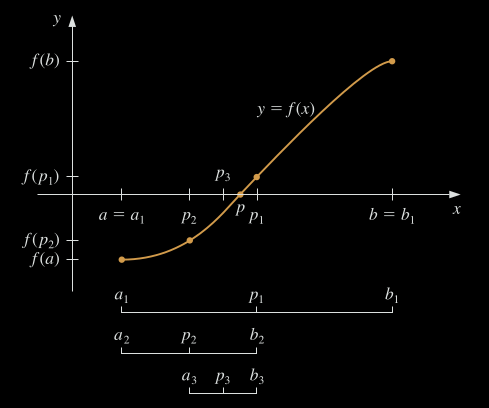

[menu](#menu)

In [ ]:
def biseccion(a,b,f, eps):
  if (f(a)*f(b) > 0.0):
     print("elija mejor el intervalo")
     return

  pbar = tqdm(desc="Calculando raíz", unit=" iter")
  while True:
    p = (a+b)/2
    print(f(p))
    # La raiz esta en el intervalo (p,b)
    if f(a)*f(p) > 0: a = p

    # La raiz esta en el intervalo (a,p)
    if f(a)*f(p) < 0: b = p

    if np.abs(f(p)) < eps: break
    pbar.update(1)
  pbar.close

In [ ]:
biseccion(0,1.0,lambda x: np.cos(x) -x, 1.0e-10)

Calculando raíz: 29 iter [00:00, 1947.28 iter/s]

0.37758256189037276
-0.018311131126179103
0.18596311950521793
0.0853349461524715
0.03387937241806649
0.00787472545850132
-0.005195711743759213
0.001345149751805108
-0.001923872780897673
-0.0002890091467900868
0.0005281584336581657
0.00011959667132188656
-8.470073137478717e-05
1.7449346639941687e-05
-3.362534821038654e-05
-8.087914744714375e-06
4.680737457851691e-06
-1.7035832658995886e-06
1.488578440400623e-06
-1.0750207668497325e-07
6.905382659017079e-07
2.915181156470936e-07
9.200802475461956e-08
-7.747024688420368e-09
4.213050031065535e-08
1.7191737922139794e-08
4.722356616859713e-09
-1.5123340357803272e-09
1.6050113460508442e-09
4.633871064640971e-11


# Metodo de punto fijo
<a name="punto_fijo"></a>

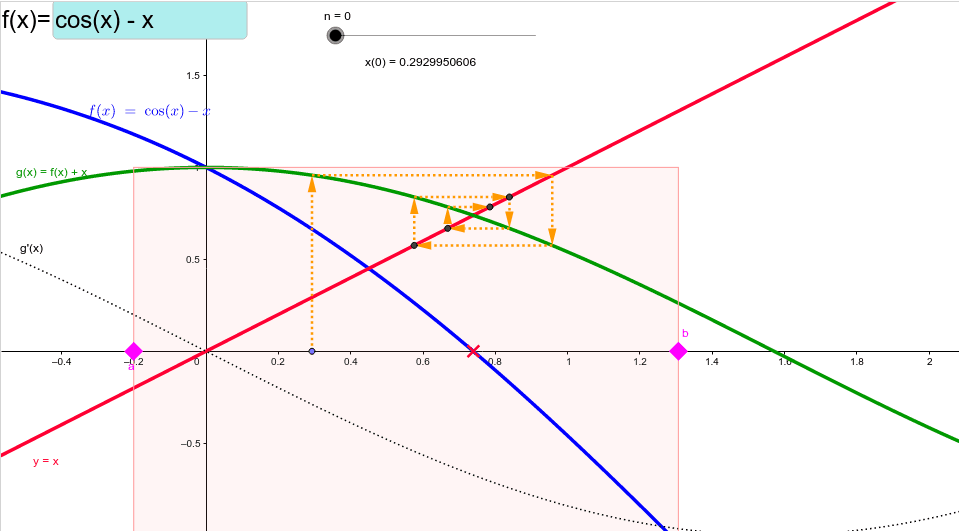

[menu](#menu)

Teoría del método de punto fijo:
Este método trata de buscar un punto p el cual dada una función $g => g(p)=p$

In [ ]:
## Cuando la derivada de g < 1 entonces en punto fijo es estable o inestable, revisar Burton
## generalizar para g(x)=f(x)+x y para g(x)=x-f(x) (Revisar foto del tablero)
def punto_fijo(p0, g, eps=1.0e-10, Nmax=1000):
  i = 1
  p = p0
  # f = lambda x: x - g(x)

  while i <= Nmax:
    pn1 = g(p)
    if np.abs(p - pn1) < eps:
      print(p)
      break
    i += 1
    p = pn1



In [ ]:
punto_fijo(0.0,lambda x: np.cos(x),1.0e-10)



0.7390851331706995


In [ ]:

    # pn+1 - p condición de parada

RecursionError: maximum recursion depth exceeded

In [15]:
def Punto_fijo(g,p,eps = 1.0e-10, Nmax=1000):
  p0 = p
  i = 0
  while i < Nmax:
    i+=1
    p = g(p0)
    print(f"iterasión {i}: p = {p}, Error = {np.abs(p - p0)}")
    if(np.abs(p-p0)<eps):break
    p0 = p
  print(f"Converge en iteración {i} con p = {p}")


In [ ]:
Punto_fijo(lambda x: np.cos(x),0.0,1.0e-10)

iterasión 1: p = 1.0, Error = 1.0
iterasión 2: p = 0.5403023058681398, Error = 0.45969769413186023
iterasión 3: p = 0.8575532158463934, Error = 0.31725090997825367
iterasión 4: p = 0.6542897904977791, Error = 0.2032634253486143
iterasión 5: p = 0.7934803587425656, Error = 0.13919056824478648
iterasión 6: p = 0.7013687736227565, Error = 0.0921115851198091
iterasión 7: p = 0.7639596829006542, Error = 0.06259090927789768
iterasión 8: p = 0.7221024250267077, Error = 0.04185725787394645
iterasión 9: p = 0.7504177617637605, Error = 0.028315336737052776
iterasión 10: p = 0.7314040424225098, Error = 0.019013719341250734
iterasión 11: p = 0.7442373549005569, Error = 0.012833312478047088
iterasión 12: p = 0.7356047404363474, Error = 0.008632614464209487
iterasión 13: p = 0.7414250866101092, Error = 0.0058203461737618145
iterasión 14: p = 0.7375068905132428, Error = 0.003918196096866389
iterasión 15: p = 0.7401473355678757, Error = 0.0026404450546329006
iterasión 16: p = 0.7383692041223232, Error

In [16]:
import numpy as np

g1 = lambda x: np.sqrt((1/2)*(3+x-x**4))
g2 = lambda x: np.power(3+x-2*x**2,1/4)

Punto_fijo(g2,.5)

iterasión 1: p = 1.3160740129524924, Error = 0.8160740129524924
iterasión 2: p = 0.9607411247622109, Error = 0.3553328881902815
iterasión 3: p = 1.2059016482663816, Error = 0.24516052350417072
iterasión 4: p = 1.0672770797184412, Error = 0.13862456854794036
iterasión 5: p = 1.1565373058078792, Error = 0.08926022608943796
iterasión 6: p = 1.1032314550459899, Error = 0.05330585076188932
iterasión 7: p = 1.1366155012436896, Error = 0.033384046197699746
iterasión 8: p = 1.116299401644155, Error = 0.02031609959953462
iterasión 9: p = 1.1288855014249868, Error = 0.012586099780831805
iterasión 10: p = 1.1211728058620454, Error = 0.007712695562941407
iterasión 11: p = 1.125931056483761, Error = 0.004758250621715643
iterasión 12: p = 1.1230076281656247, Error = 0.0029234283181363008
iterasión 13: p = 1.1248083411215393, Error = 0.0018007129559145518
iterasión 14: p = 1.1237009117416494, Error = 0.001107429379889835
iterasión 15: p = 1.1243826326082222, Error = 0.0006817208665728103
iterasión 16

importante:  Taylor

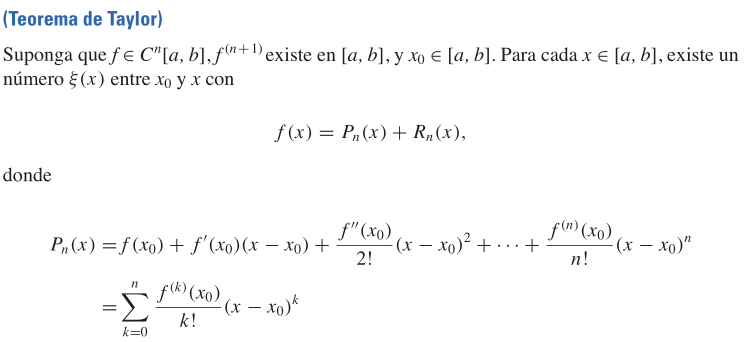

# Método de Newton-Raphson
<a name="newton_raphson"></a>

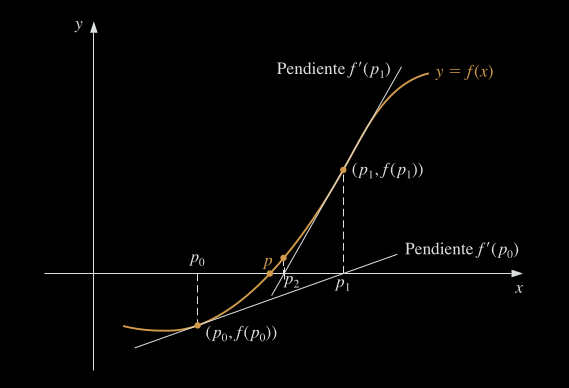

[menu](#menu)

Se obtienen las aproximaciones usando tangentes sucesivas

In [20]:

def newton_raphson(p0, f, df, e=1.0e-10, Nmax=100):
    i = 1
    while i <= Nmax:
        p = p0 - f(p0) / df(p0)
        print(f"Iteración {i}: p = {p}, Error = {np.abs(p - p0)}")

        if np.abs(p - p0) < e:  # Condición de convergencia
            print(f"Converge en iteración {i} con p = {p}")
            return p

        i += 1
        p0 = p

    print("No converge después del número máximo de iteraciones.")
    return None


## Método de punto fijo VS Método de Newton Raphson

In [22]:
Punto_fijo(lambda x: np.cos(x),.5)

iterasión 1: p = 0.8775825618903728, Error = 0.37758256189037276
iterasión 2: p = 0.6390124941652592, Error = 0.23857006772511358
iterasión 3: p = 0.8026851006823349, Error = 0.1636726065170757
iterasión 4: p = 0.6947780267880062, Error = 0.10790707389432874
iterasión 5: p = 0.7681958312820161, Error = 0.07341780449400992
iterasión 6: p = 0.719165445942419, Error = 0.04903038533959703
iterasión 7: p = 0.752355759421527, Error = 0.03319031347910795
iterasión 8: p = 0.7300810631378233, Error = 0.02227469628370371
iterasión 9: p = 0.7451203413514401, Error = 0.015039278213616836
iterasión 10: p = 0.7350063090148431, Error = 0.010114032336597023
iterasión 11: p = 0.7418265226432459, Error = 0.006820213628402794
iterasión 12: p = 0.7372357254422314, Error = 0.004590797201014518
iterasión 13: p = 0.7403296518782632, Error = 0.003093926436031791
iterasión 14: p = 0.7382462383322335, Error = 0.0020834135460297
iterasión 15: p = 0.7396499627696612, Error = 0.0014037244374277558
iterasión 16: p 

In [21]:
df = lambda x: -np.sin(x)-1  # Derivada de la función a estudiar en el método de Newton - Raphson
newton_raphson(0.5, lambda x:np.cos(x)-x,df)

Iteración 1: p = 0.7552224171056364, Error = 0.2552224171056364
Iteración 2: p = 0.7391416661498792, Error = 0.016080750955757228
Iteración 3: p = 0.7390851339208068, Error = 5.653222907242572e-05
Iteración 4: p = 0.7390851332151607, Error = 7.056460971099909e-10
Iteración 5: p = 0.7390851332151607, Error = 0.0
Converge en iteración 5 con p = 0.7390851332151607


0.7390851332151607

# Método de la Secante
<a name="secante"></a>

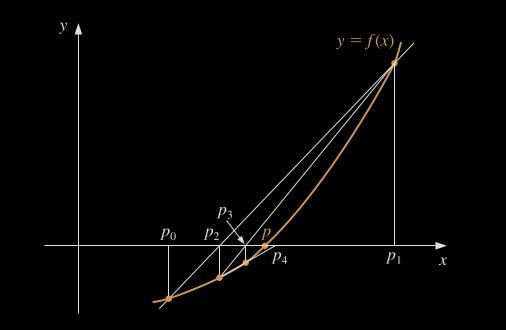

[menu](#menu)

El método de Newton-Raphson es extremadamente poderoso, como se vio anteriormete, pero la ***debilidad*** de este método es que debemos conocer la ***derivada*** de la función ***f***.

In [24]:
def secante(f,p0=.5,p1=np.pi/4,e=1e-5,Nmax=100):
  i = 2
  q0 = f(p0)
  q1 = f(p1)

  while i<= Nmax:
    p = p1 - q1*(p1-p0)/(q1-q0)

    print(f"Iteración {i-1}: p = {p}, Error = {np.abs(p-p1)}")
    if np.abs(p-p1) < e:
      print(f"Converge en iteración {i-1} con p = {p}")
      return p
    i += 1
    p0 = p1
    q0 = q1
    p1 = p
    q1 = f(p)
  return f"El método falló despues de {Nmax} iteraciones"

In [25]:
secante(lambda x:np.cos(x)-x)

Iteración 1: p = 0.7363841388365822, Error = 0.04901402456086612
Iteración 2: p = 0.7390581392138897, Error = 0.0026740003773075838
Iteración 3: p = 0.7390851493372764, Error = 2.7010123386683738e-05
Iteración 4: p = 0.7390851332150645, Error = 1.6122211898839112e-08
Converge en iteración 4 con p = 0.7390851332150645


0.7390851332150645

De lo obtenido se puede obsevar que el método de Newton provee una aproximacón un poco más rápida que el método de la secante.

# Método de posición falsa
<a name="posicion_falsa"></a>

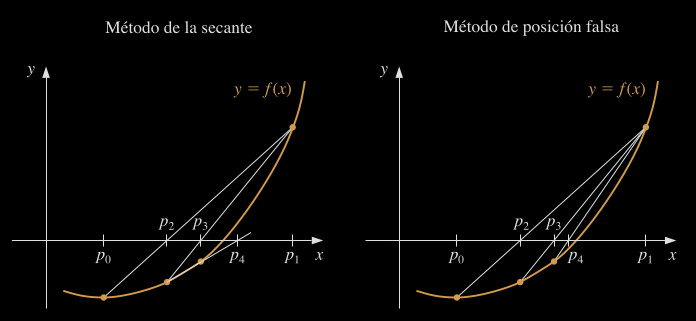

[menu](#menu)




In [34]:
def regula_falsi(f,p0=.5,p1=np.pi/4,e=1e-5,Nmax=100):
  i = 2
  q0 = f(p0)
  q1 = f(p1)

  while i <= Nmax:
    p = p1 - q1*(p1-p0)/(q1-q0)

    print(f"Iteración {i-1}: p = {p}, Error = {np.abs(p-p1)}")
    if np.abs(p-p1) < e:
      print(f"Converge en iteración {i-1} con p = {p}")
      return p

    i += 1
    ## Hasta aqui igual al método de la secante
    q = f(p)

    if q*q1 < 0: #Al ser negativo este producto me dice que los puntos f(p_i) y f(p_j) aún están uno sobre el eje "y" y otro bajo este eje
      p0 = p1
      q0 = q1

    p1 = p
    q1 = q

  return f"El método falló despues de {Nmax} iteraciones"


In [32]:
regula_falsi(lambda x: np.cos(x)-x)

Iteración 1: p = 0.7363841388365822, Error = 0.04901402456086612
Iteración 2: p = 0.7390581392138897, Error = 0.0026740003773075838
Iteración 3: p = 0.7390848638147098, Error = 2.672460082009387e-05
Iteración 4: p = 0.7390851305265789, Error = 2.667118690347081e-07
Converge en iteración 4 con p = 0.7390851305265789


0.7390851305265789

## Método de la ecante VS Posición falsa

# Método de Steffensen
<a name="Steffensen"></a>
[menu](#menu)


# Bibliografía
<a name="bibliografia"></a>

* Richard L. Burden_ Annette M. Burden_ Douglas J. Faires - Análisis numérico (2017, CENGAGE Learning)
* https://procesosnumericos2015.weebly.com/
* https://www.geogebra.org/m/Q2yMukrD